# Introduction

Nous disposons de deux ensembles de données. Un spécifique à la Berce du Caucase et un autre contenant de nombreuses informations sur plusieurs néophytes.

Dans ce notebook, nous effectuerons une Analyse Exploratoire des données contenues dans ces fichiers, afin de déterminer si l'un d'entre eux est plus prometteur.

Nous disposions également de la documentation suivante pour le contenu de chaque champ du dataset de Info flora : [documentation_infoflora.xlsx](../../data/raw/metadata/documentation_infoflora.xlsx)

## Processus

Dans un premier temps, nous allons nettoyer et trier les données de chaque dataset, pour ne garder que celles qui nous intéressent. Dans un deuxième temps, nous allons comparer les deux datasets afin de déterminer lequel des deux contient le plus de données et si la répartition sur le temps est intéressante.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pyproj import Transformer
import folium
from ipywidgets import Output

# Premier dataset : Berce du Caucase

In [2]:
df_berce = pd.read_excel('../../data/raw/berce_du_caucase.xlsx')

In [3]:
print("Nombre d'enregistrements :", len(df_berce))
print("Nombre de colonnes :",len(df_berce.columns))

pd.set_option('display.max_columns', None) # pour afficher toutes les colonnes
print(f"\nAperçu des 10 premières lignes :")
df_berce.head(10)

Nombre d'enregistrements : 26611
Nombre de colonnes : 50

Aperçu des 10 premières lignes :


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2881063189,83fdfd3d-3a25-4705-9fbe-3db1d1892b13,INFOFLORA-TRAC-4707071,Plantae,Tracheophyta,Magnoliopsida,Apiales,Apiaceae,Heracleum,Heracleum mantegazzianum,NaN,SPECIES,Heracleum mantegazzianum Sommier & Levier,Heracleum mantegazzianum Sommier & Levier,Sommier & Levier,CH,NaN,Vs,PRESENT,NaN,64ee55c9-570a-42af-b7da-3f13c6b4e5a9,46.29982,7.91708,25.0,NaN,658.0,1.0,NaN,NaN,1899-12-30,30.0,12.0,1899,3034825,3034825,HUMAN_OBSERVATION,NaN,NaN,INFOFLORA-TRAC-4707071,NaN,NaN,NaT,CC_BY_4_0,https://www.infoflora.ch,NaN,NaN,NaN,2024-06-03 01:16:56.505,NaN,TAXON_MATCH_TAXON_ID_IGNORED
1,2882060319,83fdfd3d-3a25-4705-9fbe-3db1d1892b13,INFOFLORA-TRAC-6427214,Plantae,Tracheophyta,Magnoliopsida,Apiales,Apiaceae,Heracleum,Heracleum mantegazzianum,NaN,SPECIES,Heracleum mantegazzianum Sommier & Levier,Heracleum mantegazzianum Sommier & Levier,Sommier & Levier,CH,NaN,So,PRESENT,NaN,64ee55c9-570a-42af-b7da-3f13c6b4e5a9,47.14918,7.50258,7.0,NaN,500.0,NaN,NaN,NaN,1905-06-29,29.0,6.0,1905,3034825,3034825,HUMAN_OBSERVATION,NaN,NaN,INFOFLORA-TRAC-6427214,NaN,NaN,NaT,CC_BY_4_0,https://www.infoflora.ch,NaN,NaN,NaN,2024-06-03 01:17:10.363,NaN,TAXON_MATCH_TAXON_ID_IGNORED
2,2881984429,83fdfd3d-3a25-4705-9fbe-3db1d1892b13,INFOFLORA-TRAC-6427213,Plantae,Tracheophyta,Magnoliopsida,Apiales,Apiaceae,Heracleum,Heracleum mantegazzianum,NaN,SPECIES,Heracleum mantegazzianum Sommier & Levier,Heracleum mantegazzianum Sommier & Levier,Sommier & Levier,CH,NaN,So,PRESENT,NaN,64ee55c9-570a-42af-b7da-3f13c6b4e5a9,47.14918,7.50258,7.0,NaN,500.0,NaN,NaN,NaN,1905-06-28,28.0,6.0,1905,3034825,3034825,HUMAN_OBSERVATION,NaN,NaN,INFOFLORA-TRAC-6427213,NaN,NaN,NaT,CC_BY_4_0,https://www.infoflora.ch,NaN,NaN,NaN,2024-06-03 01:17:06.719,NaN,TAXON_MATCH_TAXON_ID_IGNORED
3,2881259938,83fdfd3d-3a25-4705-9fbe-3db1d1892b13,INFOFLORA-TRAC-3964916,Plantae,Tracheophyta,Magnoliopsida,Apiales,Apiaceae,Heracleum,Heracleum mantegazzianum,NaN,SPECIES,Heracleum mantegazzianum Sommier & Levier,Heracleum mantegazzianum Sommier & Levier,Sommier & Levier,CH,NaN,Vs,PRESENT,NaN,64ee55c9-570a-42af-b7da-3f13c6b4e5a9,46.01516,7.73562,3000.0,NaN,1700.0,NaN,NaN,NaN,1923-09-02,2.0,9.0,1923,3034825,3034825,PRESERVED_SPECIMEN,BERN,Solothurner Herbarien: Herbarium Rudolf Probst,INFOFLORA-TRAC-3964916,NaN,NaN,NaT,CC_BY_4_0,https://www.infoflora.ch,NaN,NaN,NaN,2024-06-03 01:13:34.594,NaN,TAXON_MATCH_TAXON_ID_IGNORED;COLLECTION_MATCH_...
4,2881092063,83fdfd3d-3a25-4705-9fbe-3db1d1892b13,INFOFLORA-TRAC-3964917,Plantae,Tracheophyta,Magnoliopsida,Apiales,Apiaceae,Heracleum,Heracleum mantegazzianum,NaN,SPECIES,Heracleum mantegazzianum Sommier & Levier,Heracleum mantegazzianum Sommier & Levier,Sommier & Levier,CH,NaN,So,PRESENT,NaN,64ee55c9-570a-42af-b7da-3f13c6b4e5a9,47.22541,7.51125,707.0,NaN,500.0,NaN,NaN,NaN,1928-09-20,20.0,9.0,1928,3034825,3034825,PRESERVED_SPECIMEN,BERN,Solothurner Herbarien: Herbarium Rudolf Probst,INFOFLORA-TRAC-3964917,NaN,NaN,NaT,CC_BY_4_0,https://www.infoflora.ch,NaN,NaN,NaN,2024-06-03 01:13:34.025,NaN,TAXON_MATCH_TAXON_ID_IGNORED;COLLECTION_MATCH_...
5,2880175936,83fdfd3d-3a25-4705-9fbe-3db1d1892b13,INFOFLORA-TRAC-3965118,Plantae,Tracheophyta,Magnoliopsida,Apiales,Apiaceae,Heracleum,Heracleum mantegazzianum,NaN,SPECIES,Heracleum mantegazzianum Sommier & Levier,Heracleum mantegazzianum Sommier & Levier,Sommier & Levier,CH,NaN,So,PRESENT,NaN,64ee55c9-570a-42af-b7da-

On a donc 26611 lignes et 50 colonnes. Cependant, comme on peut le voir ci-dessus, il y en a beaucoup qui ne sont pas intéressantes pour notre projet. Nous allons donc en retirer une partie pour ne garder que les champs intéressants.

In [4]:
print("Colonnes :\n\n", df_berce.columns)

Colonnes :

 Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')


In [5]:
columns_to_remove = [
    # Colonnes retirées directement 
    'gbifID',
    'datasetKey',
    'occurrenceID',
    'kingdom',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'species',
    'scientificName',
    'verbatimScientificName',
    'verbatimScientificNameAuthorship',
    'infraspecificEpithet',
    'taxonRank',
    'locality',
    'stateProvince',
    'publishingOrgKey',
    'taxonKey',
    'speciesKey',
    'institutionCode',
    'collectionCode',
    'catalogNumber',
    'recordNumber',
    'identifiedBy',
    'license',
    'rightsHolder',
    'recordedBy',
    'mediaType',
    'issue',

    # Colonnes retirées après une observation approfondie du fichier
    'occurrenceStatus', # valeur toujours à "PRESENT"
    'individualCount', # champ toujours vide ou 1 et une seule fois 2
    'coordinatePrecision', # champ toujours vide
    'depth', # champ toujours vide
    'depthAccuracy', # champ toujours vide et inutile vu qu'on ne garde pas 'depth'
    'typeStatus', # champ toujours vide
    'lastInterpreted', # pas utile pour notre projet
    'countryCode', # il n'y a que des specimens Suisse dans ce dataset
    'establishmentMeans' # champ toujours vide
]

df_berce_clean = df_berce.drop(columns=columns_to_remove)
df_berce_clean.head(10)

,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,elevation,elevationAccuracy,eventDate,day,month,year,basisOfRecord,dateIdentified
0,46.29982,7.91708,25.0,658.0,1.0,1899-12-30,30.0,12.0,1899,HUMAN_OBSERVATION,NaT
1,47.14918,7.50258,7.0,500.0,NaN,1905-06-29,29.0,6.0,1905,HUMAN_OBSERVATION,NaT
2,47.14918,7.50258,7.0,500.0,NaN,1905-06-28,28.0,6.0,1905,HUMAN_OBSERVATION,NaT
3,46.01516,7.73562,3000.0,1700.0,NaN,1923-09-02,2.0,9.0,1923,PRESERVED_SPECIMEN,NaT
4,47.22541,7.51125,707.0,500.0,NaN,1928-09-20,20.0,9.0,1928,PRESERVED_SPECIMEN,NaT
5,47.22541,7.51125,707.0,500.0,NaN,1928-07-04,4.0,7.0,1928,PRESERVED_SPECIMEN,NaT
6,46.75684,7.00016,1100.0,723.0,NaN,1930,NaN,NaN,1930,HUMAN_OBSERVATION,NaT
7,46.88309,7.09097,707.0,464.0,NaN,1930,NaN,NaN,1930,HUMAN_OBSERVATION,NaT
8,47.45811,9.16405,750.0,539.5,56.5,1938,NaN,NaN,1938,HUMAN_OBSERVATION,NaT
9,47.14178,8.53529,2000.0,542.0,NaN,1948-06-14,14.0,6.0,1948,HUMAN_OBSERVATION,NaT


In [6]:
# Recherche de valeurs NaN
print("Les colonnes suivantes contiennent des valeurs NaN :")
df_berce_clean.isna().any()

Les colonnes suivantes contiennent des valeurs NaN :


decimalLatitude                  False
decimalLongitude                 False
coordinateUncertaintyInMeters     True
elevation                         True
elevationAccuracy                 True
eventDate                        False
day                               True
month                             True
year                             False
basisOfRecord                    False
dateIdentified                    True
dtype: bool

## Traitement des valeurs NaN
Comme on peut le voir, de nombreuses colonnes contiennent des valeurs NaN. En particulier :
- L'incertitude de la position
- L'altitude (elevation) et la précision associée
- Le jour et le mois de l'observation
- Le champ "dateIdentified"

## Transformations à effectuer

Certains des champs conservés pourraient donner lieu à d'autres transformations :
### Recherche de valeurs NaN
Il faut vérifier si certains champs ont des valeurs NaN et, le cas échéant, voir si il est possible de définir une règle simple pour savoir si on garde l'enregistrement ou pas.

### Incertitude des coordonnées (**coordinateUncertaintyInMeters**)
On pourrait décider de retirer tous les enregistrements pour lesquels l'incertitude est supérieure à un certain seuil.

### Base d'enregistrement (**basisOfRecord**)
Ce champ indique comment le spécimen a pu être identifié. Certains spécimens ont la valeur "*PRESERVED_SPECIMEN*", ce qui veut dire qu'ils sont volontairement préservés. Typiquement, il ne faudrait pas prendre ces données si l'on souhaite mesurer l'invasion d'une espèce.

### Dates d'observation
Il y a plusieurs champs correspondant à la date : **eventDate**,  **day**, **month**, **year** ainsi que **dateIdentified**.

C'est problématique car on se sait pas laquelle utiliser. Il faudrait vérifier si ces 3 dates sont toujours équivalentes et, dans le cas contraire, choisir la plus ancienne car elle correspondra forcément à la première observation.

In [7]:
# Pour retirer tous les enregistrements avec une incertitude de position supérieur à un certain seuil

def remove_specimens_with_uncertain_position(df, threshold):
    rows = df['coordinateUncertaintyInMeters'] > threshold
    return df[~rows]


POSITION_UNCERTAINTY_THRESHOLD = 100

count_before_removal = len(df_berce_clean)
df_berce_clean = remove_specimens_with_uncertain_position(df_berce_clean, POSITION_UNCERTAINTY_THRESHOLD)
count_after_removal = len(df_berce_clean)
removed_count = count_before_removal - count_after_removal
print(f"Nombre d'enregistrements retirés : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")

# Suite à ça, on peut donc également se débarasser de la colonne 'coordinateUncertaintyInMeters'
df_berce_clean.drop(columns=['coordinateUncertaintyInMeters'], inplace=True)


Nombre d'enregistrements retirés : 933 (0.04% of total rows )


In [8]:
# On fait la même chose mais pour l'élévation (altitude)

def remove_specimens_with_uncertain_elevation(df, threshold):
    rows = df['elevationAccuracy'] > threshold
    return df[~rows]


MIN_ELEVATION_ACCURACY = 100

count_before_removal = len(df_berce_clean)
df_berce_clean = remove_specimens_with_uncertain_elevation(df_berce_clean, MIN_ELEVATION_ACCURACY)
count_after_removal = len(df_berce_clean)
removed_count = count_before_removal - count_after_removal
print(f"Nombre d'enregistrements retirés : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")

# Suite à ça, on peut donc également se débarasser de la colonne 'elevationAccuracy'
df_berce_clean.drop(columns=['elevationAccuracy'], inplace=True)

Nombre d'enregistrements retirés : 0 (0.00% of total rows )


In [9]:
# Pour retirer les enregistrements correspondant aux specimens volontairement préservés
def remove_non_invasive_specimens(df):
    rows = df['basisOfRecord'] == "PRESERVED_SPECIMEN"
    return df[~rows]

count_before_removal = len(df_berce_clean)
df_berce_clean = remove_non_invasive_specimens(df_berce_clean)
count_after_removal = len(df_berce_clean)
removed_count = count_before_removal - count_after_removal
print(f"Nombre d'enregistrements retirés : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")

# On peut donc aussi retirer cette colonne
df_berce_clean.drop(columns=['basisOfRecord'], inplace=True)

Nombre d'enregistrements retirés : 3 (0.00% of total rows )


## Vérification de la cohérence des dates

Le code ci-dessous permet de déterminer si les colonnes eventDate et year,month,day sont cohérentes ou non.

In [10]:
# Analyse des champs dates
df_berce_clean[['eventDate', 'day', 'month', 'year', 'dateIdentified']].head(100)

# Première question : Est-ce que eventDate est toujours identique au trio (day, month, year) ?

special_records = []

for idx, record in df_berce_clean[['eventDate', 'day', 'month', 'year']].iterrows():
    eventDate = record['eventDate']
    day = record['day']
    month = record['month']
    year = record['year']

    dt = pd.to_datetime(eventDate)

    if not pd.isna(year) and year != dt.year:
        special_records.append(record)
    elif not pd.isna(month) and month != dt.month:
        special_records.append(record)
    elif not pd.isna(day) and day != dt.day:
        special_records.append(record)

df_special_records = pd.DataFrame(special_records, columns=['eventDate', 'day', 'month', 'year'])
df_special_records.head()

if len(df_special_records) != 0:
    print("Il y a des incohérences entre le champ eventDate et les 3 colonnes year,month,day.")
else:
    print("Pas d'incohérence trouvées au niveau des dates.")

Pas d'incohérence trouvées au niveau des dates.


## Champ dateIdentified

Quant au champ *dateIdentified*, il correspond à une autre information que la date d'observation. Nous n'allons pas le garder.

In [11]:
# On ne garde que le champ 'eventDate' complet
df_berce_clean.drop(columns=['year', 'month', 'day', 'dateIdentified'], inplace=True)

In [12]:
df_berce_clean.head(10)

,decimalLatitude,decimalLongitude,elevation,eventDate
0,46.29982,7.91708,658.0,1899-12-30
1,47.14918,7.50258,500.0,1905-06-29
2,47.14918,7.50258,500.0,1905-06-28
14,46.39338,6.99140,1448.0,1970-01-01
15,46.34986,7.16844,1246.5,1970-01-01
19,47.33901,9.18746,900.0,1971
27,47.48006,8.10727,520.0,1980
28,46.90811,9.80881,935.0,1980
33,47.44135,7.88142,546.5,1985-06-19
34,47.45642,8.11227,690.0,1985


## Normalisation des dates

Le champ eventDate n'est pas très pratique car certaines observations n'ont pas la même quantité de données. En effet, parfois nous ne disposons que de l'année alors que dans d'autres cas on dispose d'un timestamp précis à la seconde près.

Nous allons évaluer toutes les dates pour qu'elles aient toutes le même format "année-mois-jour". Si le jour est inconnu, le 1er janvier sera présumé.

In [13]:
df_berce_clean['date'] = pd.to_datetime(df_berce_clean['eventDate'], format='ISO8601')
df_berce_clean.drop(columns=['eventDate'], inplace=True)

df_berce_clean.head(10)

C:\Users\Vicky\AppData\Local\Temp\ipykernel_23952\3129947205.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_berce_clean['date'] = pd.to_datetime(df_berce_clean['eventDate'], format='ISO8601')


,decimalLatitude,decimalLongitude,elevation,date
0,46.29982,7.91708,658.0,1899-12-30 00:00:00
1,47.14918,7.50258,500.0,1905-06-29 00:00:00
2,47.14918,7.50258,500.0,1905-06-28 00:00:00
14,46.39338,6.99140,1448.0,1970-01-01 00:00:00
15,46.34986,7.16844,1246.5,1970-01-01 00:00:00
19,47.33901,9.18746,900.0,1971-01-01 00:00:00
27,47.48006,8.10727,520.0,1980-01-01 00:00:00
28,46.90811,9.80881,935.0,1980-01-01 00:00:00
33,47.44135,7.88142,546.5,1985-06-19 00:00:00
34,47.45642,8.11227,690.0,1985-01-01 00:00:00


In [14]:
# Vérification pour savoir si il y a des valeur NaN dans le dataset final :
df_berce_clean.isna().any()

decimalLatitude     False
decimalLongitude    False
elevation            True
date                False
dtype: bool

Comme on peut le voir, on a des valeurs manquantes que pour l'élévation, ce qui n'est pas un problème car nous allons de toute façon récupérer l'altitude de chaque observation via un autre dataset.

In [15]:
# Exportation vers `df_berce.csv`

EXPORT_FOLDER = '../../data/processed/'
df_berce_clean.to_csv(EXPORT_FOLDER + 'df_berce_clean.csv', mode='w')

# Deuxième dataset : Infoflora

La documentation pour ce dataset est disponible en ligne, à ce [lien](https://www.infoflora.ch/fr/assets/content/documents/Demande_donnees/legende_fr.pdf)

In [16]:
df_flora = pd.read_csv('../../data/raw/Infoflora_extraction.csv', encoding='ANSI', low_memory=False)

df_flora.head(5)

,interpretation_note,taxon,management,control_type,eradication,doubt_status,presence,introduction,obs_day,obs_month,obs_year,observers,country,canton,municipality,x_swiss,y_swiss,xy_radius,locality_descript,altitude_min,altitude_max,abundance_cat,count_unit,abundance,cover_code,remarks,typo_ch,phenology_code,citation,obs_id,specimen_type,invasive,taxon_link,sisf_id,taxon_id,family,name_de,name_fr,name_it
0,NaN,Ailanthus altissima (Mill.) Swingle,NaN,NaN,NaN,0,+,X,NaN,NaN,1969,Paroz Robert,CH,NE,Neuchâtel,2556500.041,1203499.947,707.0,"Cormondrèche, talus de chemin de fer",560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InfoFlora,184313,NaN,INV,www.infoflora.ch/flora/1001150,9500,1001150,Simaroubaceae,Götterbaum,Ailante,Ailanto
1,NaN,Ailanthus altissima (Mill.) Swingle,NaN,NaN,NaN,0,+,X,NaN,NaN,1984,Paroz Robert,CH,NE,La Grande Béroche,2548000.041,1191999.947,500.0,NaN,490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InfoFlora,184312,NaN,INV,www.infoflora.ch/flora/1001150,9500,1001150,Simaroubaceae,Götterbaum,Ailante,Ailanto
2,low precision,Ailanthus altissima (Mill.) Swingle,NaN,NaN,NaN,0,+,X,NaN,NaN,1984,Paroz Robert,CH,NE,Milvignes,2554000.041,1201999.947,1414.0,NaN,521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InfoFlora,184314,NaN,INV,www.infoflora.ch/flora/1001150,9500,1001150,Simaroubaceae,Götterbaum,Ailante,Ailanto
3,NaN,Ailanthus altissima (Mill.) Swingle,NaN,NaN,NaN,0,+,X,NaN,NaN,1989,Duckert-Henriod Marie-Marguerite,CH,NE,Neuchâtel,2561000.041,1204899.947,250.0,à l'angle des rues des Sablons et de Comba-Borel,438.0,552.0,NaN,NaN,NaN,NaN,Coupé en 1990,NaN,NaN,InfoFlora,184315,NaN,INV,www.infoflora.ch/flora/1001150,9500,1001150,Simaroubaceae,Götterbaum,Ailante,Ailanto
4,low precision,Ailanthus altissima (Mill.) Swingle,NaN,NaN,NaN,1,+,N,NaN,NaN,1992,Clot François,CH,VD,Lausanne,2538000.041,1151999.947,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InfoFlora (Archiv Atlas Welten & Sutter),1862,NaN,INV,www.infoflora.ch/flora/1001150,9500,1001150,Simaroubaceae,Götterbaum,Ailante,Ailanto


In [17]:
print("Colonnes :\n\n", df_flora.columns)

Colonnes :

 Index(['interpretation_note', 'taxon', 'management', 'control_type',
       'eradication', 'doubt_status', 'presence', 'introduction', 'obs_day',
       'obs_month', 'obs_year', 'observers', 'country', 'canton',
       'municipality', 'x_swiss', 'y_swiss', 'xy_radius', 'locality_descript',
       'altitude_min', 'altitude_max', 'abundance_cat', 'count_unit',
       'abundance', 'cover_code', 'remarks', 'typo_ch', 'phenology_code',
       'citation', 'obs_id', 'specimen_type', 'invasive', 'taxon_link',
       'sisf_id', 'taxon_id', 'family', 'name_de', 'name_fr', 'name_it'],
      dtype='object')


In [18]:
columns_to_remove = [
    # Colonnes retirées directement 
    #'taxon', # nom scientifique complet + nom auteur
    'control_type', # methode de lutte 
    'eradication', # état de l'espèce
    'management', # lutte ou non
    'introduction', # comment la plante a été introduite
    'observers', # nom(s) du ou des observateurs
    'country', # toujours égal à CH
    'canton',
    'municipality',
    'locality_descript', # description de l'endroit
    'abundance_cat', # abondance des specimens, souvent vide
    'count_unit', # relatif à l'abondance
    'abundance', # informations supplémentaires par rapport à la taille du specimen
    'cover_code', # souvent vide
    'remarks', # remarques supplémentaires
    'typo_ch', # type d'habitatsss
    'phenology_code', # stade de développement de la plante
    'citation', # citation de la source de données
    'obs_id', # id de l'observation
    'specimen_type', # type d'observation
    'invasive', # redondant, car toutes les espèces de ce dataset sont envahissantes
    'taxon_link', # doc plante
    'sisf_id', # id taxonomique
    'taxon_id', # id taxon
    'family',
    'name_de',
    'name_fr',
    'name_it'
]

df_flora_clean = df_flora.drop(columns=columns_to_remove)
df_flora_clean.head(10)

,interpretation_note,taxon,doubt_status,presence,obs_day,obs_month,obs_year,x_swiss,y_swiss,xy_radius,altitude_min,altitude_max
0,NaN,Ailanthus altissima (Mill.) Swingle,0,+,NaN,NaN,1969,2556500.041,1203499.947,707.0,560.0,NaN
1,NaN,Ailanthus altissima (Mill.) Swingle,0,+,NaN,NaN,1984,2548000.041,1191999.947,500.0,490.0,NaN
2,low precision,Ailanthus altissima (Mill.) Swingle,0,+,NaN,NaN,1984,2554000.041,1201999.947,1414.0,521.0,NaN
3,NaN,Ailanthus altissima (Mill.) Swingle,0,+,NaN,NaN,1989,2561000.041,1204899.947,250.0,438.0,552.0
4,low precision,Ailanthus altissima (Mill.) Swingle,1,+,NaN,NaN,1992,2538000.041,1151999.947,9999.0,NaN,NaN
5,NaN,Ailanthus altissima (Mill.) Swingle,0,+,NaN,NaN,1993,2563500.041,1206399.947,250.0,456.0,600.0
6,low precision,Ailanthus altissima (Mill.) Swingle,0,+,NaN,NaN,1994,2570000.041,1210999.947,1414.0,431.0,NaN
7,NaN,Ailanthus altissima (Mill.) Swingle,1,+,NaN,NaN,1996,2538500.001,1153500.001,707.0,514.0,663.0
8,NaN,Ailanthus altissima (Mill.) Swingle,1,+,NaN,NaN,1996,2537500.001,1154500.001,707.0,567.0,609.0
9,NaN,Ailanthus altissima (Mill.) Swingle,1,+,NaN,NaN,1996,2535500.001,1153500.001,707.0,396.0,473.0


# Colonnes à utiliser dans la sélection des données

- `interpretation_note` : Donne des informations sur la qualité des données
- `doubt_status` : doute sur l'identification de la plante
- `presence` : indique si la plante est toujours là
- `xy_radius` : précision des coordonnées
- `altitude_min` et `altitude_max` : précision de l'altitude

In [19]:
# 1. Retirer les données douteuses ou invalides
def remove_bad_data(df):
    invalid_tags = [
        'doubtful',
        'not valid',
        'absence',
        'introduced/cultivated',
        #'low precision' # à voir si nécessaire
    ]
    rows = df['interpretation_note'].isin(invalid_tags)
    return df[~rows]

count_before_removal = len(df_flora_clean)
df_flora_clean = remove_bad_data(df_flora_clean)
count_after_removal = len(df_flora_clean)
removed_count = count_before_removal - count_after_removal
print(f"Enregistrements invalides retirés : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")


# 2. Retirer les specimens dont l'identification est incertaine
def remove_badly_identified_specimens(df):
    invalid_codes = ['2','3']
    rows = df['doubt_status'].isin(invalid_codes)
    return df[~rows]

count_before_removal = len(df_flora_clean)
df_flora_clean = remove_badly_identified_specimens(df_flora_clean)
count_after_removal = len(df_flora_clean)
removed_count = count_before_removal - count_after_removal
print(f"Specimens mal identifiés retirés : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")

# 3. Retirer les observations qui ne sont plus à jour
def remove_outdated_observations(df):
    outdated_codes = ['-', 'I']
    rows = df['presence'].isin(outdated_codes)
    return df[~rows]

count_before_removal = len(df_flora_clean)
df_flora_clean = remove_outdated_observations(df_flora_clean)
count_after_removal = len(df_flora_clean)
removed_count = count_before_removal - count_after_removal
print(f"Observations plus à jour retirées : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")

# 4. Retirer les données pas précises
def remove_unprecise_coords(df):
    rows = df['xy_radius'] > POSITION_UNCERTAINTY_THRESHOLD
    return df[~rows]

def remove_unprecise_elevations(df):
    rows = (df['altitude_max'] - df['altitude_min']) > MIN_ELEVATION_ACCURACY
    return df[~rows]

count_before_removal = len(df_flora_clean)
df_flora_clean = remove_unprecise_coords(df_flora_clean)
count_after_removal = len(df_flora_clean)
removed_count = count_before_removal - count_after_removal
print(f"Observations avec coordonnées XY pas précises : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")


count_before_removal = len(df_flora_clean)
df_flora_clean = remove_unprecise_elevations(df_flora_clean)
count_after_removal = len(df_flora_clean)
removed_count = count_before_removal - count_after_removal
print(f"Observations avec altitude pas précise : {removed_count} ({(removed_count / count_before_removal):.2f}% of total rows )")

Enregistrements invalides retirés : 2118 (0.03% of total rows )
Specimens mal identifiés retirés : 0 (0.00% of total rows )
Observations plus à jour retirées : 0 (0.00% of total rows )
Observations avec coordonnées XY pas précises : 1911 (0.03% of total rows )
Observations avec altitude pas précise : 3 (0.00% of total rows )


In [20]:
# Retirer les colonnes dont on a plus besoin
df_flora_clean.drop(columns=['interpretation_note'], inplace=True)
df_flora_clean.drop(columns=['doubt_status'], inplace=True)
df_flora_clean.drop(columns=['presence'], inplace=True)
df_flora_clean.drop(columns=['xy_radius'], inplace=True)

In [21]:
df_flora_clean['taxon'].value_counts()
df_flora_clean.head(10)

,taxon,obs_day,obs_month,obs_year,x_swiss,y_swiss,altitude_min,altitude_max
71,Ailanthus altissima (Mill.) Swingle,NaN,6.0,1998,2550967.041,1147511.947,590.0,NaN
72,Ailanthus altissima (Mill.) Swingle,14.0,6.0,2000,2541700.041,1150699.947,372.0,405.0
73,Ailanthus altissima (Mill.) Swingle,14.0,6.0,2000,2541700.041,1150699.947,390.0,NaN
119,Ailanthus altissima (Mill.) Swingle,20.0,6.0,2002,2565500.041,1127749.947,450.0,520.0
120,Ailanthus altissima (Mill.) Swingle,13.0,9.0,2002,2533699.566,1152650.485,390.0,400.0
127,Ailanthus altissima (Mill.) Swingle,18.0,6.0,2003,2563977.041,1207051.947,570.0,NaN
128,Ailanthus altissima (Mill.) Swingle,11.0,10.0,2003,2507500.041,1137849.947,405.0,NaN
130,Ailanthus altissima (Mill.) Swingle,6.0,8.0,2003,2554000.041,1146299.947,385.0,NaN
141,Ailanthus altissima (Mill.) Swingle,NaN,NaN,2003,2554500.041,1145799.947,392.0,404.0
143,Ailanthus altissima (Mill.) Swingle,NaN,NaN,2003,2558000.041,1143699.947,391.0,400.0


## Normalisation des dates

Comme pour l'autre fichier sur les Berces, il convient de mettre toutes les dates au même format.

In [22]:
df_flora_clean.rename(columns={'obs_day':'day','obs_month':'month','obs_year':'year'}, inplace=True)
df_flora_clean.fillna(value={'day':1, 'month':1}, inplace=True)

df_flora_clean['date'] = pd.to_datetime(df_flora_clean[['year','month','day']])
df_flora_clean.drop(columns=['year','month','day'], inplace=True)

df_flora_clean.head(10)

,taxon,x_swiss,y_swiss,altitude_min,altitude_max,date
71,Ailanthus altissima (Mill.) Swingle,2550967.041,1147511.947,590.0,NaN,1998-06-01
72,Ailanthus altissima (Mill.) Swingle,2541700.041,1150699.947,372.0,405.0,2000-06-14
73,Ailanthus altissima (Mill.) Swingle,2541700.041,1150699.947,390.0,NaN,2000-06-14
119,Ailanthus altissima (Mill.) Swingle,2565500.041,1127749.947,450.0,520.0,2002-06-20
120,Ailanthus altissima (Mill.) Swingle,2533699.566,1152650.485,390.0,400.0,2002-09-13
127,Ailanthus altissima (Mill.) Swingle,2563977.041,1207051.947,570.0,NaN,2003-06-18
128,Ailanthus altissima (Mill.) Swingle,2507500.041,1137849.947,405.0,NaN,2003-10-11
130,Ailanthus altissima (Mill.) Swingle,2554000.041,1146299.947,385.0,NaN,2003-08-06
141,Ailanthus altissima (Mill.) Swingle,2554500.041,1145799.947,392.0,404.0,2003-01-01
143,Ailanthus altissima (Mill.) Swingle,2558000.041,1143699.947,391.0,400.0,2003-01-01


In [23]:
# Exportation en CSV
df_flora_clean.to_csv(EXPORT_FOLDER + 'df_flora_clean.csv', mode='w')

## Conversion de coordonnées LV95 en coordonnées terrestre

In [24]:
# Initialisation du transformateur entre LV95 (EPSG:2056) et WGS84 (EPSG:4326)
transformer = Transformer.from_crs("EPSG:2056", "EPSG:4326", always_xy=True)

# Conversion des coordonnées LV95 en WGS84
df_flora_clean[['decimalLongitude', 'decimalLatitude']] = df_flora_clean.apply(
    lambda row: transformer.transform(row['x_swiss'], row['y_swiss']),
    axis=1, 
    result_type="expand"
)

## Comparaison des deux fichiers

In [25]:
print("> Nb d'observations de Berces du Caucase :", len(df_berce_clean))

print("> Nombre d'observations pour chaque plante du dataset Infoflora :")
print(df_flora_clean['taxon'].value_counts())

> Nb d'observations de Berces du Caucase : 25675
> Nombre d'observations pour chaque plante du dataset Infoflora :
taxon
Senecio inaequidens DC.                45365
Buddleja davidii Franch.                4747
Robinia pseudoacacia L.                 3492
Prunus laurocerasus L.                  2658
Ailanthus altissima (Mill.) Swingle     2616
Reynoutria japonica Houtt.              2105
Solidago canadensis L.                  1997
Rhus typhina L.                          746
Ambrosia artemisiifolia L.               413
Name: count, dtype: int64


# Variétés de plantes

Ci-dessous, une dizaine d'histogrammes présentant le nombre d'enregistrements de chaque plante pour chaque année depuis le premier enregistrement.

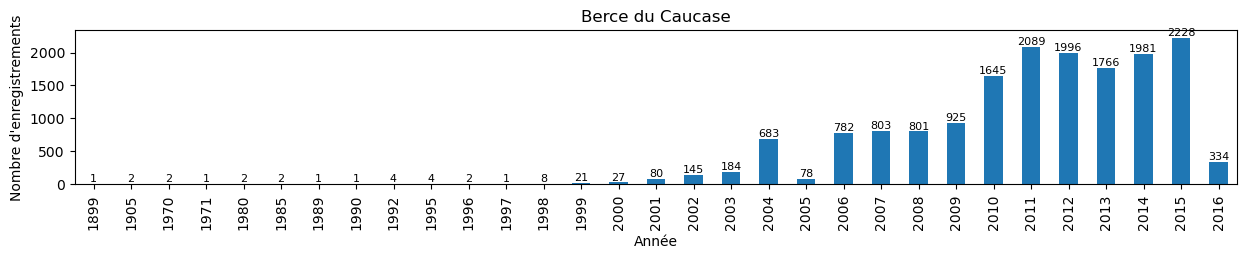

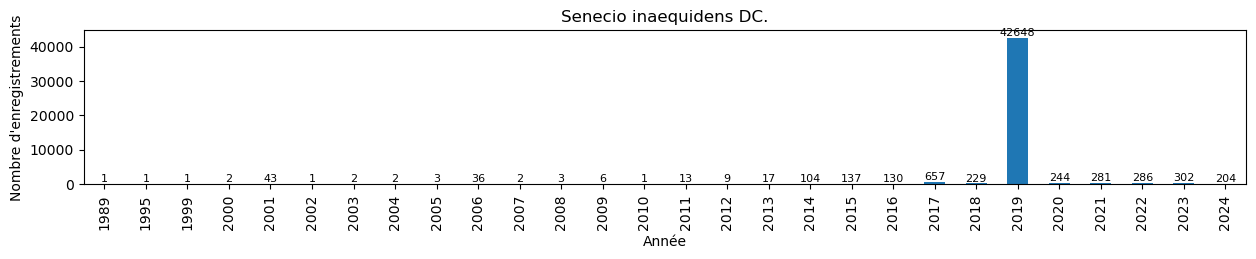

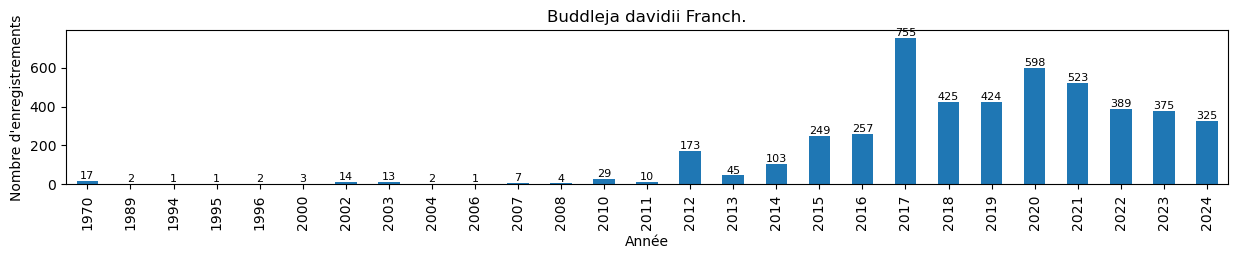

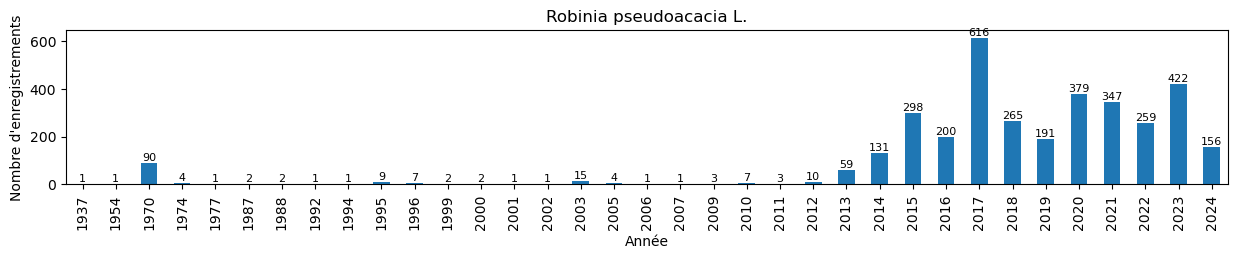

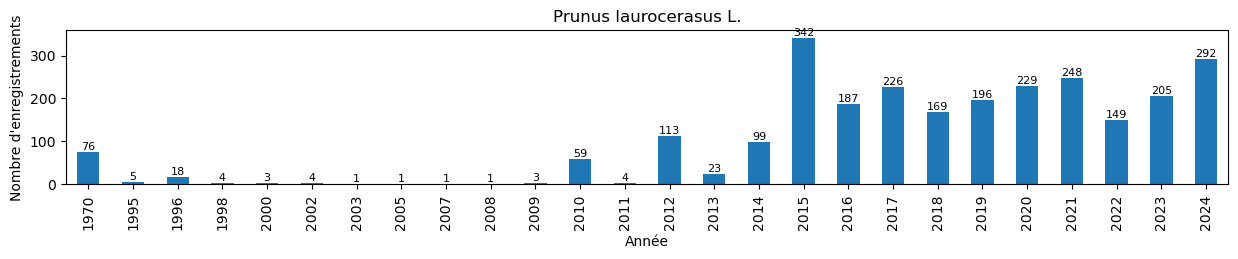

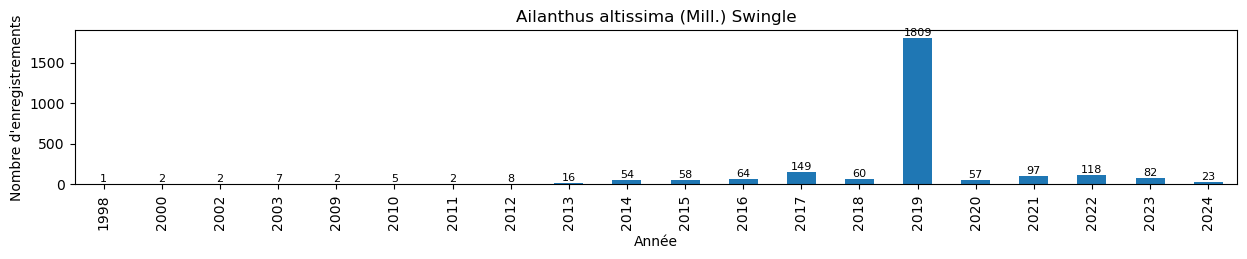

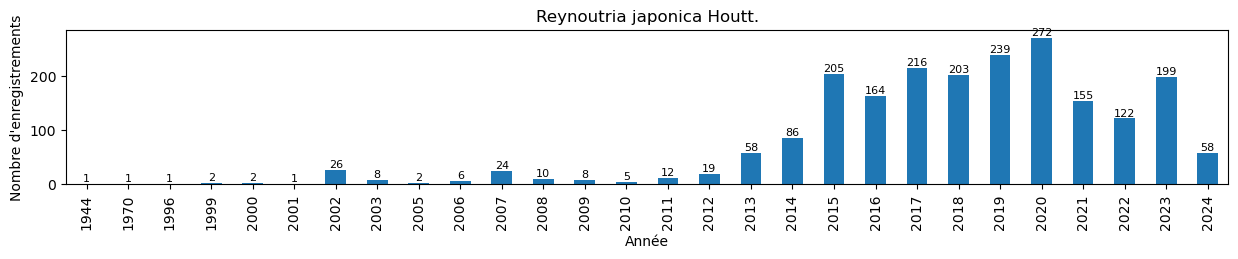

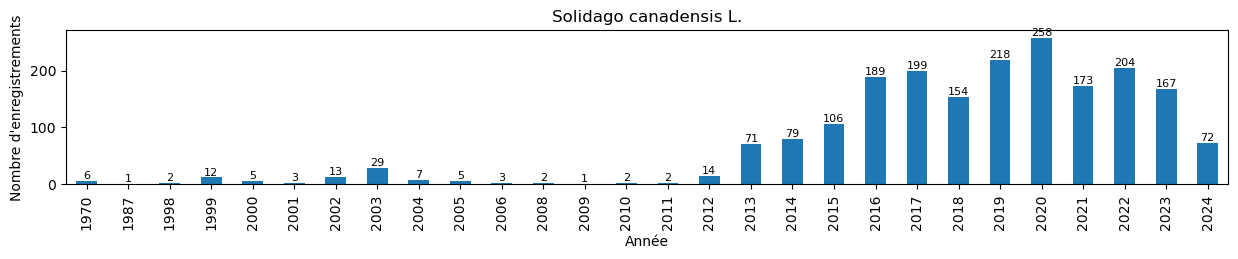

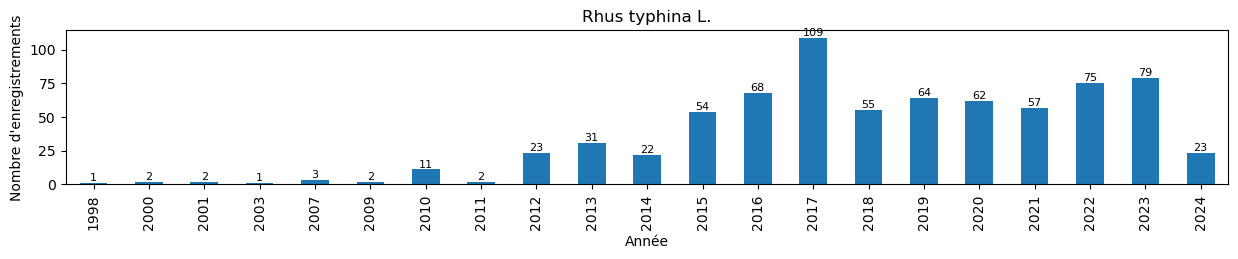

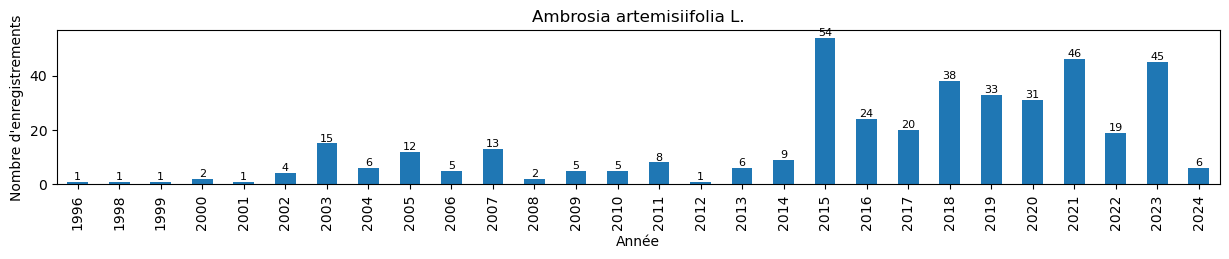

In [26]:
def plot_years(df, dateColumnName, title):
    years = pd.to_datetime(df[dateColumnName], errors='coerce')
    years = years.dt.year.astype('Int64')
    plt.figure(figsize=(15,2))
    year_counts = years.value_counts().sort_index()

    bars = year_counts.plot(kind='bar')

    # Ajouter le nombre exact au-dessus de chaque barre
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom', size=8)
        
    plt.title(title)
    plt.xlabel('Année')
    plt.ylabel('Nombre d\'enregistrements')
    plt.show()

def show_plant_variety_histograms(berce, infoflora):
    plot_years(berce, 'date', 'Berce du Caucase')

    for plant, count in infoflora['taxon'].value_counts().items():
        data =  infoflora[infoflora['taxon'] == plant]
        plot_years(data, 'date', plant)

show_plant_variety_histograms(df_berce_clean, df_flora_clean)

# Analyse plus détaillée de certaines plantes

Nous avons décidé de garder les 2 spécimens avec le plus de données, càd la Berce du Caucase et l'arbre à papillons (Buddleja Davidii). Nous n'avons pas gardé les autres pour une ou plusieurs des raisons suivantes :
- Trop peu de données (< 4000)
- Mauvaise répartition des données (p.ex. le deuxième histogramme ci-dessus: Senecio inaequidens)

Suite à ça, on peut refaire un plot des histogrammes pour mieux comparer.

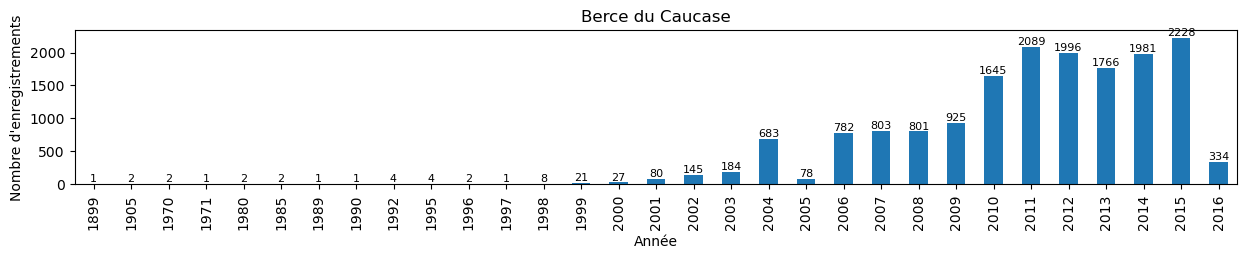

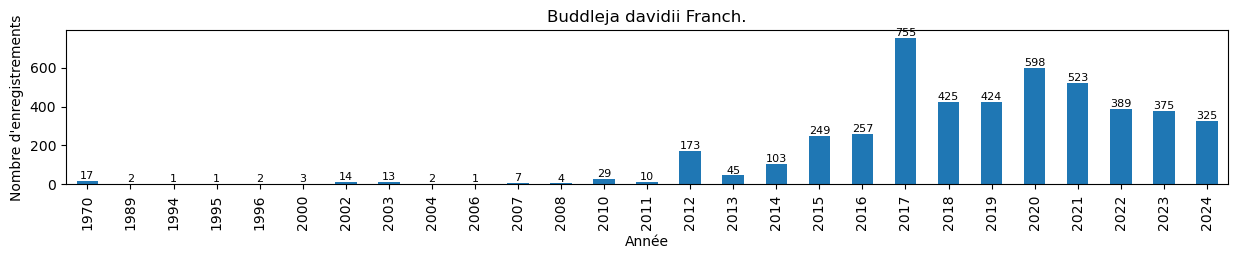

In [27]:
df_flora_clean_reduced = df_flora_clean[df_flora_clean['taxon'] == 'Buddleja davidii Franch.']

show_plant_variety_histograms(df_berce_clean, df_flora_clean_reduced)

# Choix du specimen pour le projet

Les distributions des deux spécimens sont similaires mais on a quand même beaucoup plus de données pour la Berce, ce qui est extrêmement important étant donné que nous allons utiliser du machine learning. Le seul désavantage du dataset sur la Berce est qu'on manque de données récentes (après 2016). Cela dit, nous pensons que nous obtiendrons quand même de meilleurs résultats avec ce dataset plutôt qu'avec un des spécimens de Infoflora.

# Visualisation de la répartition des berces en Suisse

In [28]:
output = Output()

def show_map(data):
    m = folium.Map(location=[46.8182, 8.2275], tiles='Cartodb Positron', zoom_start=8, prefer_canvas=True)

    for idx, row in data.iterrows():
        folium.Circle(
            location=(row['decimalLatitude'], row['decimalLongitude']),
            radius=5,
            color="black",
            weight=0.1,
            fill_opacity=0.6,
            opacity=1,
            fill_color="green",
            fill=False  # gets overridden by fill_color
        ).add_to(m)

    with output:
        output.clear_output(wait=True)
        display(m)

data_points = df_berce_clean.copy()
data_points['year'] = pd.to_datetime(data_points['date'], errors='coerce').dt.year.astype('Int64')
show_map(data_points)

output

Output()

## Commentaires sur la carte

En observant quelques points sur la carte, on remarque rapidement que les points se trouvent systématiquement le long de chemins ou de routes. Cela est dû au fait que les points sont répertoriés par des personnes et ces dernières sont plus susceptibles de se trouver sur un chemin ou une route que au milieu d'une montage. C'est la limitation principale de notre dataset, il nous reste à découvrir si le recensement par des personnes constitue un bon proxy, ou non.



## Le cas atypique des "Sénecons du Cap"

Il y a un spécimen avec plus de 45000 enregistrements le même jour. C'est très atypique, nous avons donc décidé d'investiguer un peu la situation (même si ce n'est pas l'espèce que nous allons retenir). Nous avons donc affiché la carte de répartition pour cette plante :

In [29]:
data_points = df_flora_clean[df_flora_clean['taxon'] == 'Senecio inaequidens DC.'].copy()
data_points['year'] = pd.to_datetime(data_points['date'], errors='coerce').dt.year.astype('Int64')

# On ne peut pas afficher deux maps Folium dans le même notebook, décommentez la ligne suivante pour afficher la deuxième carte
#show_map(data_points)

On peut voir qu'il y a des observations tout le long de la route de Genève jusqu'à Yverdon et Murten.